# Concrete Strength Prediction

## Introduction
Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.

## Goal
To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os,sys
import itertools as it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Increase cell width
display(HTML("<style>.container { width:98% !important; }</style>"))

# Update seaborn default style
sns.set_style("ticks")
sns.set_context("notebook")

my_random_state = 5

## Read Data

In [2]:
concrete_df_orig = pd.read_csv("concrete.csv")

In [3]:
full_df = concrete_df_orig.copy()

In [4]:
print("")
print("Concrete Strength Data")
print("**********************")
print("")
display(HTML(full_df.head(10).to_html()))


Concrete Strength Data
**********************



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


### Datatypes and Description

#### Info

In [5]:
print("")
print("Concrete Strength Data -- Info")
print(full_df.info())


Concrete Strength Data -- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


##### Observation
* Dataset has 1030 entries
* It has 9 attributes
* **age** column is of type int
* Other columns are of type float
* There are no null values in terms of missing values or NaN for any of the columns

#### Description
Based on the problem statement, the description of the columns are:

----

<pre>
<b>cement</b>       (quantitative) : Cement (kg in a m3 mixture)             -- <i>Input Variable</i>  : kg in a m3 mixture
<b>slag</b>         (quantitative) : Blast Furnace Slag (kg in a m3 mixture) -- <i>Input Variable</i>  : kg in a m3 mixture
<b>ash</b>          (quantitative) : Fly Ash (kg in a m3 mixture)            -- <i>Input Variable</i>  : kg in a m3 mixture
<b>water</b>        (quantitative) : Water (kg in a m3 mixture)              -- <i>Input Variable</i>  : kg in a m3 mixture
<b>superplastic</b> (quantitative) : Superplasticizer (kg in a m3 mixture    -- <i>Input Variable</i>  : kg in a m3 mixture
<b>coarseagg</b>    (quantitative) : Coarse Aggregate (kg in a m3 mixture)   -- <i>Input Variable</i>  : kg in a m3 mixture
<b>fineagg</b>      (quantitative) : Fine Aggregate (kg in a m3 mixture)     -- <i>Input Variable</i>  : kg in a m3 mixture
<b>age</b>          (quantitative) : Age (kg in a m3 mixture)                -- <i>Input Variable</i>  : Day (1~365)
<b>strength</b>     (quantitative) : Concrete compressive strength (MPa)     -- <i>Output Variable</i> : MPa
</pre>

----


##### Observation
* Based on this description, we see that all the attributes have the right data types in the dataset.

#### Shape

In [6]:
print("")
print("Concrete Strength Data -- Shape")
print(full_df.shape)


Concrete Strength Data -- Shape
(1030, 9)


### Separate Training and Testing Data
In order to prevent any data leak, we will separate the training and testing data in the beginning and then conduct the EDA and FE after the split.

In [7]:
all_columns = full_df.columns.difference(["strength"])
full_df_input = full_df[all_columns]
full_df_output = full_df[["strength"]]

In [8]:
temp_X_train, temp_X_test, temp_Y_train, temp_Y_test = train_test_split(full_df_input, full_df_output, test_size=0.30, random_state=my_random_state)

In [9]:
train_df = pd.concat([temp_X_train, temp_Y_train], axis=1).reset_index(drop=True)

In [10]:
test_df = pd.concat([temp_X_test, temp_Y_test], axis=1).reset_index(drop=True)

In [11]:
print("")
print("After Split - Concrete Strength Data -- Shape (Training Set)")
print(train_df.shape)


After Split - Concrete Strength Data -- Shape (Training Set)
(721, 9)


In [12]:
print("")
print("After Split - Concrete Strength Data -- Shape (Testing Set)")
print(test_df.shape)


After Split - Concrete Strength Data -- Shape (Testing Set)
(309, 9)


### Summary of Data

In [13]:
print("")
print("Concrete Strength Data -- Describe")
display(HTML(train_df.describe().T.to_html()))


Concrete Strength Data -- Describe


,count,mean,std,min,25%,50%,75%,max
age,721.0,46.000000,65.766295,1.00,7.00,28.00,56.0,365.0
ash,721.0,52.626214,63.363680,0.00,0.00,0.00,118.2,195.0
cement,721.0,283.182663,104.804061,102.00,194.70,277.00,350.0,540.0
coarseagg,721.0,974.148405,77.887191,801.00,932.00,968.00,1030.0,1145.0
fineagg,721.0,772.568932,80.309778,594.00,733.00,779.30,824.0,992.6
slag,721.0,74.785992,86.702312,0.00,0.00,22.00,144.7,359.4
superplastic,721.0,6.242164,6.212382,0.00,0.00,6.10,10.3,32.2
water,721.0,181.375728,21.354502,121.80,164.90,185.00,192.0,247.0
strength,721.0,35.929154,16.861833,4.57,23.79,33.94,46.2,82.6


### Univariate Analysis


********************************************************* Analysis of : age *********************************************************

Null Values?                        : False
Na Values?                          : False
Min                                 : 1
Max                                 : 365
Range                               : 364.00
--------------
Mean                                : 46.00
Median                              : 28.00
Std Dev                             : 65.77
Skew                                : 3.26 (positive skew)
--------------
Q1 (1st Quartile)                   : 7.0
Q3 (3rd Quartile)                   : 56.0
IQR                                 : 49.00
------- Outliers using IQR -------
Lower whisker                       : -66.50
Upper whisker                       : 129.50
Number of lower outliers            : 0
Number of upper outliers            : 42
% of the lower outliers, in dataset : 0.00%
% of the upper outliers, in dataset : 5.83%



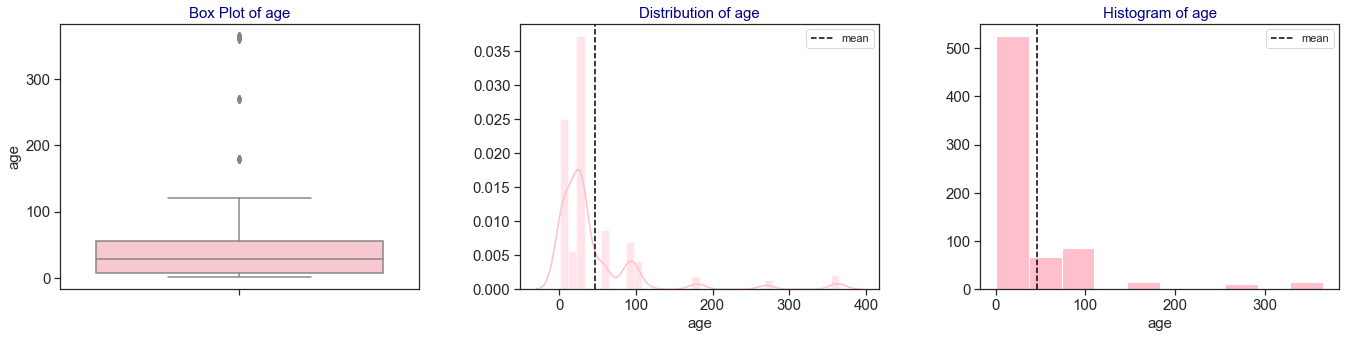


*************************************************************************************************************************************

********************************************************* Analysis of : ash *********************************************************

Null Values?                        : False
Na Values?                          : False
Min                                 : 0.0
Max                                 : 195.0
Range                               : 195.00
--------------
Mean                                : 52.63
Median                              : 0.00
Std Dev                             : 63.36
Skew                                : 0.56 (positive skew)
--------------
Q1 (1st Quartile)                   : 0.0
Q3 (3rd Quartile)                   : 118.2
IQR                                 : 118.20
------- Outliers using IQR -------
Lower whisker                       : -177.30
Upper whisker                       : 295.50
Number of lower outliers         

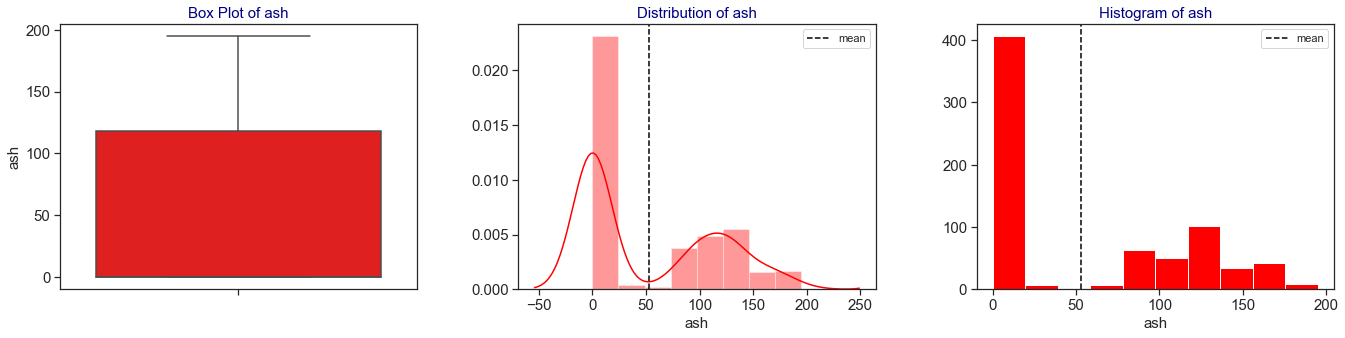


*************************************************************************************************************************************

********************************************************* Analysis of : cement *********************************************************

Null Values?                        : False
Na Values?                          : False
Min                                 : 102.0
Max                                 : 540.0
Range                               : 438.00
--------------
Mean                                : 283.18
Median                              : 277.00
Std Dev                             : 104.80
Skew                                : 0.48 (positive skew)
--------------
Q1 (1st Quartile)                   : 194.7
Q3 (3rd Quartile)                   : 350.0
IQR                                 : 155.30
------- Outliers using IQR -------
Lower whisker                       : -38.25
Upper whisker                       : 582.95
Number of lower outlier

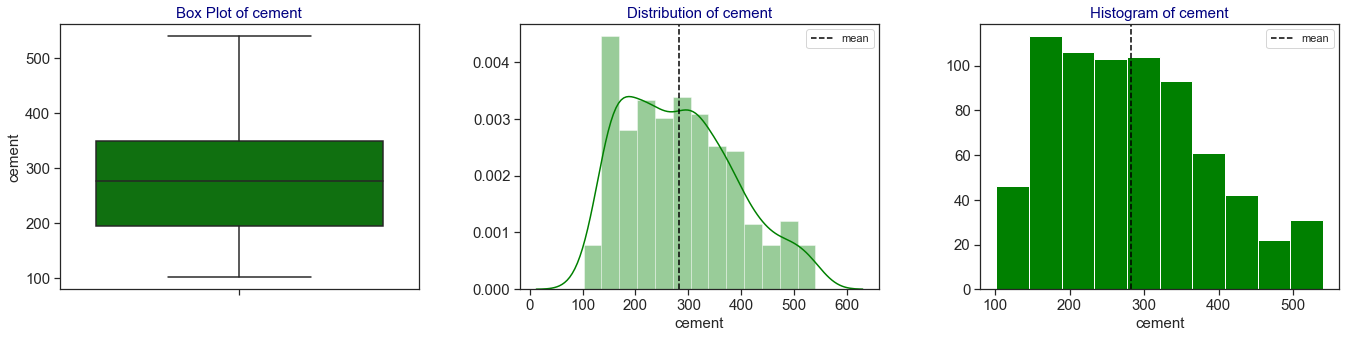


*************************************************************************************************************************************

********************************************************* Analysis of : coarseagg *********************************************************

Null Values?                        : False
Na Values?                          : False
Min                                 : 801.0
Max                                 : 1145.0
Range                               : 344.00
--------------
Mean                                : 974.15
Median                              : 968.00
Std Dev                             : 77.89
Skew                                : -0.06 (negative skew)
--------------
Q1 (1st Quartile)                   : 932.0
Q3 (3rd Quartile)                   : 1030.0
IQR                                 : 98.00
------- Outliers using IQR -------
Lower whisker                       : 785.00
Upper whisker                       : 1177.00
Number of lower ou

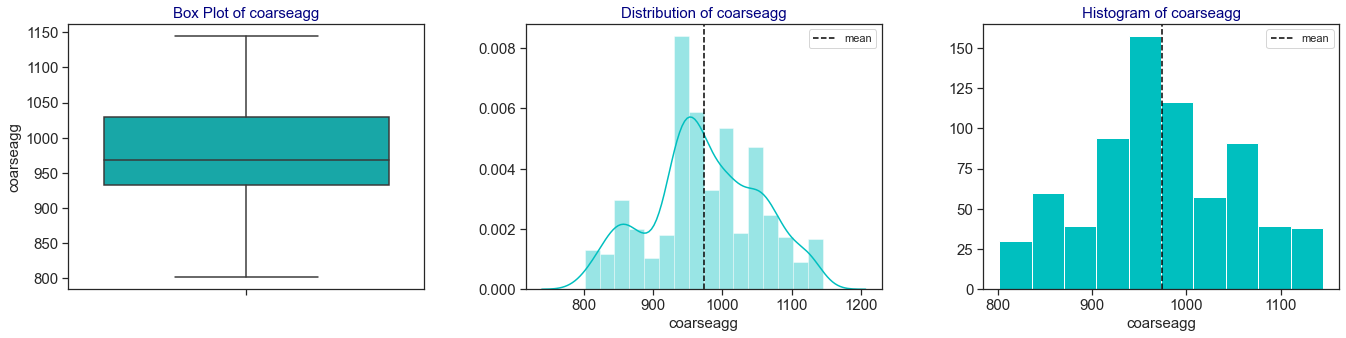


*************************************************************************************************************************************

********************************************************* Analysis of : fineagg *********************************************************

Null Values?                        : False
Na Values?                          : False
Min                                 : 594.0
Max                                 : 992.6
Range                               : 398.60
--------------
Mean                                : 772.57
Median                              : 779.30
Std Dev                             : 80.31
Skew                                : -0.30 (negative skew)
--------------
Q1 (1st Quartile)                   : 733.0
Q3 (3rd Quartile)                   : 824.0
IQR                                 : 91.00
------- Outliers using IQR -------
Lower whisker                       : 596.50
Upper whisker                       : 960.50
Number of lower outlier

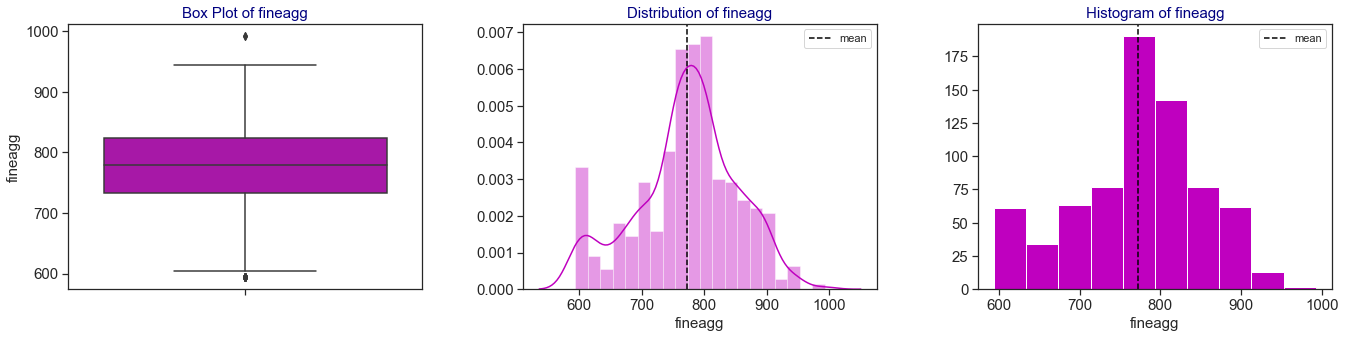


*************************************************************************************************************************************

********************************************************* Analysis of : slag *********************************************************

Null Values?                        : False
Na Values?                          : False
Min                                 : 0.0
Max                                 : 359.4
Range                               : 359.40
--------------
Mean                                : 74.79
Median                              : 22.00
Std Dev                             : 86.70
Skew                                : 0.78 (positive skew)
--------------
Q1 (1st Quartile)                   : 0.0
Q3 (3rd Quartile)                   : 144.7
IQR                                 : 144.70
------- Outliers using IQR -------
Lower whisker                       : -217.05
Upper whisker                       : 361.75
Number of lower outliers       

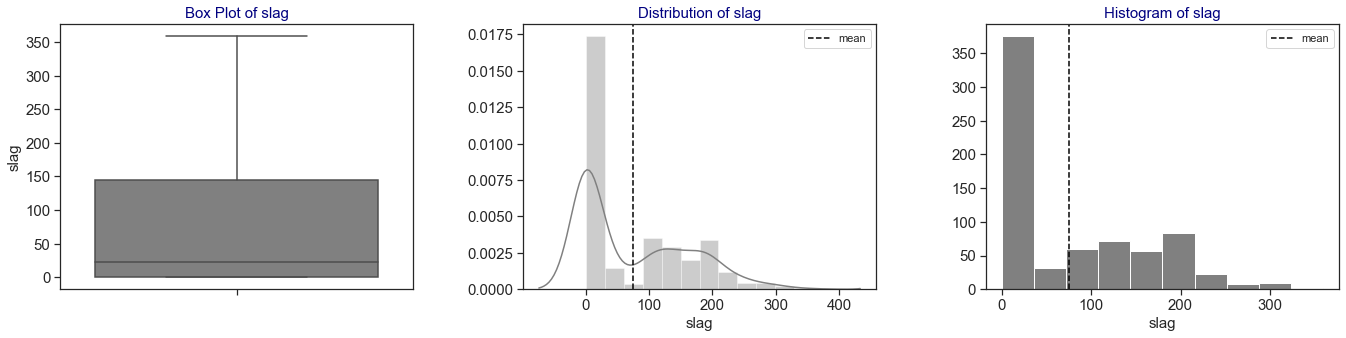


*************************************************************************************************************************************

********************************************************* Analysis of : superplastic *********************************************************

Null Values?                        : False
Na Values?                          : False
Min                                 : 0.0
Max                                 : 32.2
Range                               : 32.20
--------------
Mean                                : 6.24
Median                              : 6.10
Std Dev                             : 6.21
Skew                                : 1.03 (positive skew)
--------------
Q1 (1st Quartile)                   : 0.0
Q3 (3rd Quartile)                   : 10.3
IQR                                 : 10.30
------- Outliers using IQR -------
Lower whisker                       : -15.45
Upper whisker                       : 25.75
Number of lower outliers        

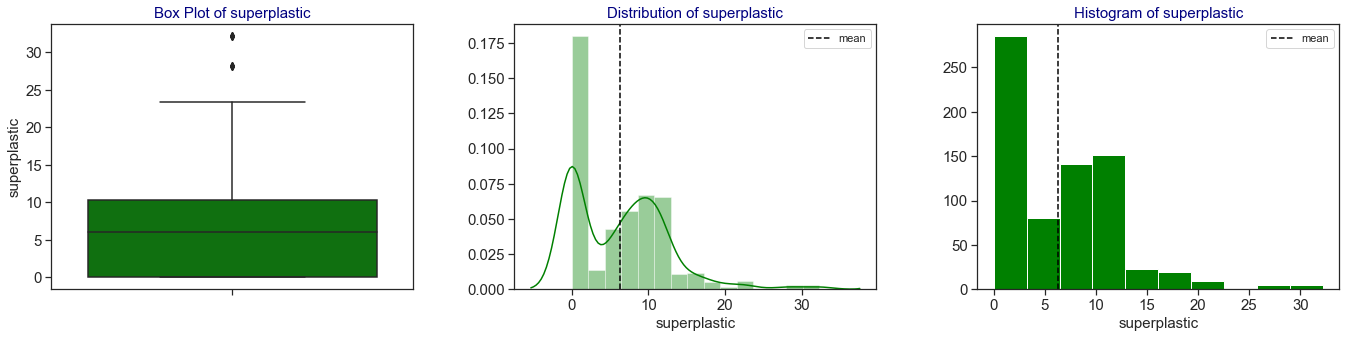


*************************************************************************************************************************************

********************************************************* Analysis of : water *********************************************************

Null Values?                        : False
Na Values?                          : False
Min                                 : 121.8
Max                                 : 247.0
Range                               : 125.20
--------------
Mean                                : 181.38
Median                              : 185.00
Std Dev                             : 21.35
Skew                                : 0.14 (positive skew)
--------------
Q1 (1st Quartile)                   : 164.9
Q3 (3rd Quartile)                   : 192.0
IQR                                 : 27.10
------- Outliers using IQR -------
Lower whisker                       : 124.25
Upper whisker                       : 232.65
Number of lower outliers  

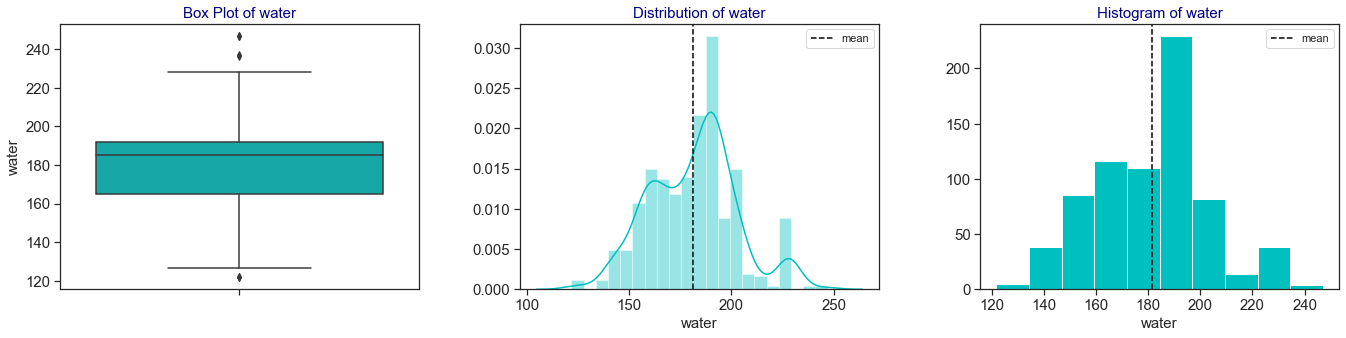


*************************************************************************************************************************************

********************************************************* Analysis of : strength *********************************************************

Null Values?                        : False
Na Values?                          : False
Min                                 : 4.57
Max                                 : 82.6
Range                               : 78.03
--------------
Mean                                : 35.93
Median                              : 33.94
Std Dev                             : 16.86
Skew                                : 0.49 (positive skew)
--------------
Q1 (1st Quartile)                   : 23.79
Q3 (3rd Quartile)                   : 46.2
IQR                                 : 22.41
------- Outliers using IQR -------
Lower whisker                       : -9.83
Upper whisker                       : 79.82
Number of lower outliers       

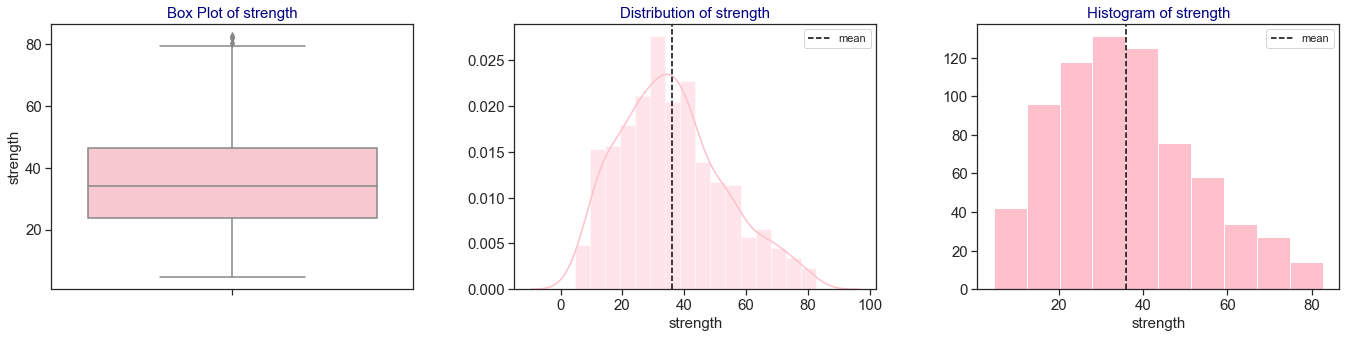


*************************************************************************************************************************************


In [14]:
cols_colors = ["pink","r","g","c","m","grey","g","c", "pink"]
cols_length = len(train_df.columns)

for column, index, color in it.zip_longest(train_df.columns, range(cols_length), cols_colors):
    print("")
    print("********************************************************* Analysis of : {0} *********************************************************".format(column))
    print("")
    minimum = train_df[column].min()
    maximum = train_df[column].max()
    min_max_range = maximum - minimum
    print("Null Values?                        : {}".format(train_df[column].isnull().any()))
    print("Na Values?                          : {}".format(train_df[column].isna().any()))
    print("Min                                 : {}".format(minimum))
    print("Max                                 : {}".format(maximum))
    print("Range                               : {0:0.2f}".format(min_max_range))
    print("--------------")
    print("Mean                                : {0:0.2f}".format(train_df[column].mean()))
    print("Median                              : {0:0.2f}".format(train_df[column].median()))
    print("Std Dev                             : {0:0.2f}".format(train_df[column].std()))
    col_skew = train_df[column].skew()
    col_skew_str = "positive skew" if col_skew > 0 else "negative skew"
    print("Skew                                : {0:0.2f} ({1})".format(col_skew, col_skew_str))
    print("--------------")
    q1 = train_df[column].quantile(q=0.25)
    q3 = train_df[column].quantile(q=0.75)
    iqr = q3 - q1
    print("Q1 (1st Quartile)                   : {}".format(q1))
    print("Q3 (3rd Quartile)                   : {}".format(q3))
    print("IQR                                 : {0:0.2f}".format(iqr))
    print("------- Outliers using IQR -------")
    lower_whisker = q1 - 1.5 * (iqr)
    upper_whisker = q3 + 1.5 * (iqr)
    print("Lower whisker                       : {0:0.2f}".format(lower_whisker))
    print("Upper whisker                       : {0:0.2f}".format(upper_whisker))
    num_below_lower = train_df[train_df[column] < lower_whisker][column].count()
    num_above_upper = train_df[train_df[column] > upper_whisker][column].count()
    perc_below_lower = (num_below_lower / len(train_df)) * 100
    perc_above_upper = (num_above_upper / len(train_df)) * 100
    print("Number of lower outliers            : {}".format(num_below_lower))
    print("Number of upper outliers            : {}".format(num_above_upper))
    print("% of the lower outliers, in dataset : {0:0.2f}%".format(perc_below_lower))
    print("% of the upper outliers, in dataset : {0:0.2f}%".format(perc_above_upper))
    print("")
    

    fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,6), edgecolor='k')

    #boxplot
    sns.boxplot(x=column,data=train_df,orient='v',ax=ax1, color=color)
    ax1.set_ylabel(column, fontsize=15)
    ax1.set_title('Box Plot of {}'.format(column), fontsize=15, color="navy")
    ax1.tick_params(labelsize=15)

    #distplot
    sns.distplot(train_df[column],ax=ax2, color=color)
    ax2.axvline(train_df[column].mean(),linestyle="dashed",label="mean",color="k")
    ax2.legend(loc="best")
    ax2.set_xlabel(column, fontsize=15)
    ax2.set_title('Distribution of {}'.format(column), fontsize=15, color="navy")
    ax2.tick_params(labelsize=15)

    #histogram
    ax3.hist(train_df[column], color=color)
    ax3.axvline(train_df[column].mean(),linestyle="dashed",label="mean",color="k")
    ax3.legend(loc="best")
    ax3.set_xlabel(column, fontsize=15)
    ax3.set_title('Histogram of {}'.format(column), fontsize=15, color="navy")
    ax3.tick_params(labelsize=15)

    plt.tight_layout(pad=4.5)
    plt.show();

    print("")
    
    print("*************************************************************************************************************************************")

##### Observation
* **Null Values** - None of the attributes have null or missing values.
* **Missing Values** - From dataset description (the resource website), we know that they are no missing values. So 0 (zero) is a valid value.
<br><br>
* **age** - Has multiple gaussians and is positively skewed with long tail
* **ash** - Has two gaussians and is positively skewed with long tail
* **slag** - Has three gaussians and is positively skewed with long tail
* **superplastic** - Has two gaussians and is positively skewed with long tail
* **coarseagg** - Has three gaussians and looks normally distributed
* **fineagg** - Has two gaussians and looks normally distributed
* **water** - Has three gaussians and looks normally distributed
* **cement** - Shows slight skewness and looks almost normal
* **strength** has postive skewness and looks almost normal
<br><br>
* **ash**, **cement**, **coarseagg**, **slag** have no outliers using IQR method
* rest of the columns have some outliers which need to be handled

### Bi-variate analysis

#### Pairplot

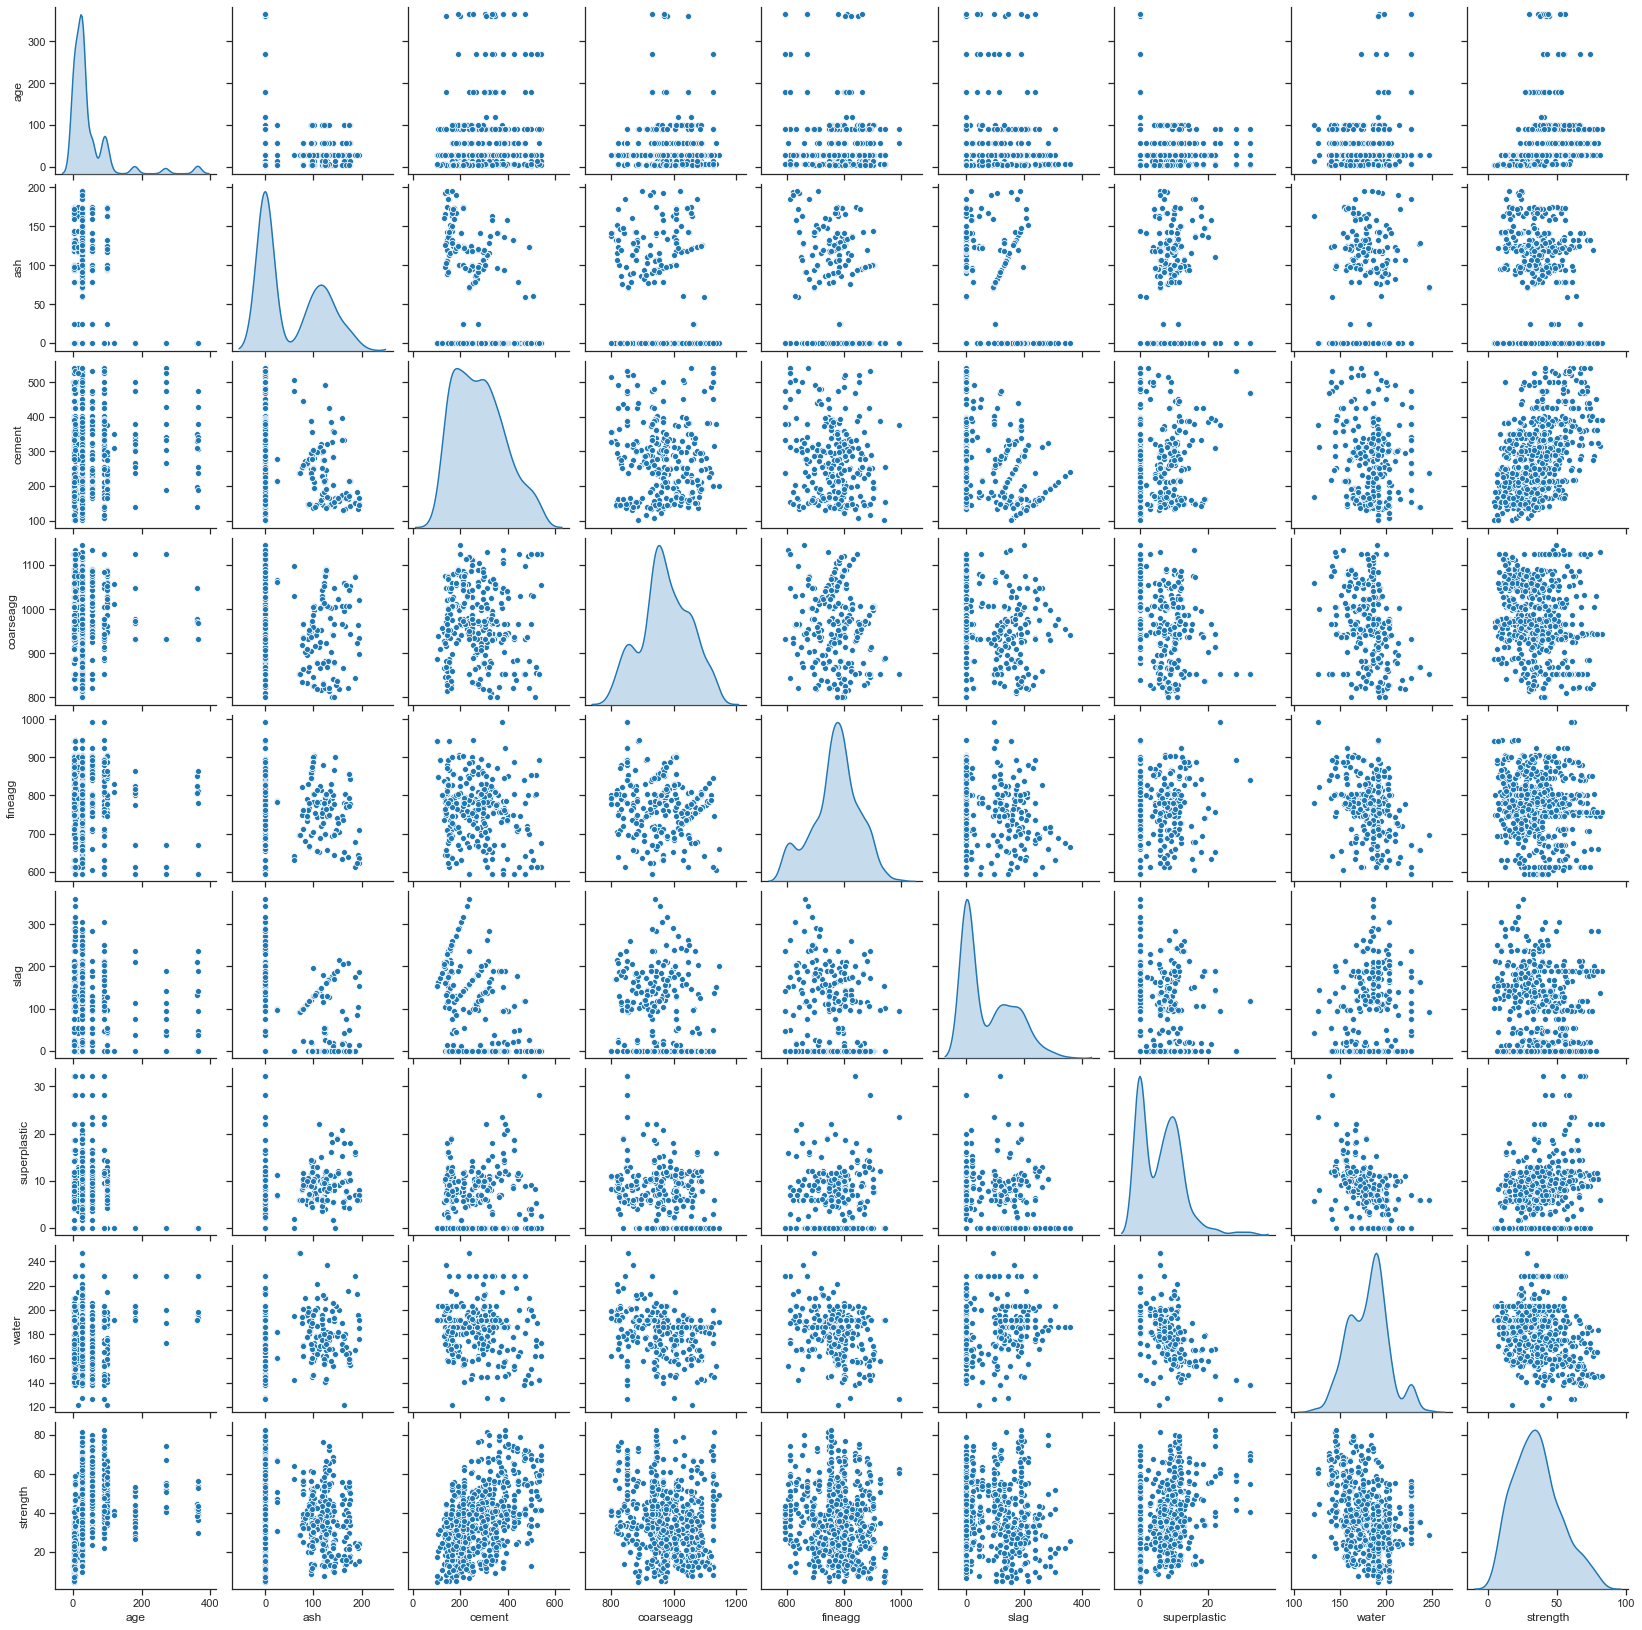

In [15]:
sns.pairplot(train_df,diag_kind='kde')
plt.show();

##### Observation
* **age vs other predictors**
    * Doesnt seem to show any significant relationship with other predictors
    * Extreme values for age, seems to exist for min values of *ash* and *superplastic*
* **ash vs other predictors**
    * Doesnt seem to show any significant relationship with other predictors
* **cement vs other predictors**
    * Doesnt seem to show any significant relationship with other predictors
* **coarseagg vs other predictors**
    * Doesnt seem to show any significant relationship with other predictors other than water
    * With water, looks like there is a slight negative relationship
* **fineagg vs other predictors**
    * Doesnt seem to show any significant relationship with other predictors other than water
    * With water, looks like there is a slight negative relationship
* **slag vs other predictors**
    * Doesnt seem to show any significant relationship with other predictors
* **superplastic vs other predictors**
    * Doesnt seem to show any significant relationship with other predictors other than water
    * With water, looks like there is a slight negative relationship
* **water vs other predictors**
    * Has slight negative relationship with *coarseagg*, *fineagg* and *superplastic*
    * Doesnt seem to show any significant relationship with other predictors
<br><br>
* **strength vs predictors**
    * Has moderate positive relationship with *cement*
    * Has slight negative relationship with *water*
    * Doesnt seem to show any significant relationship with other predictors

#### Correlation Matrix

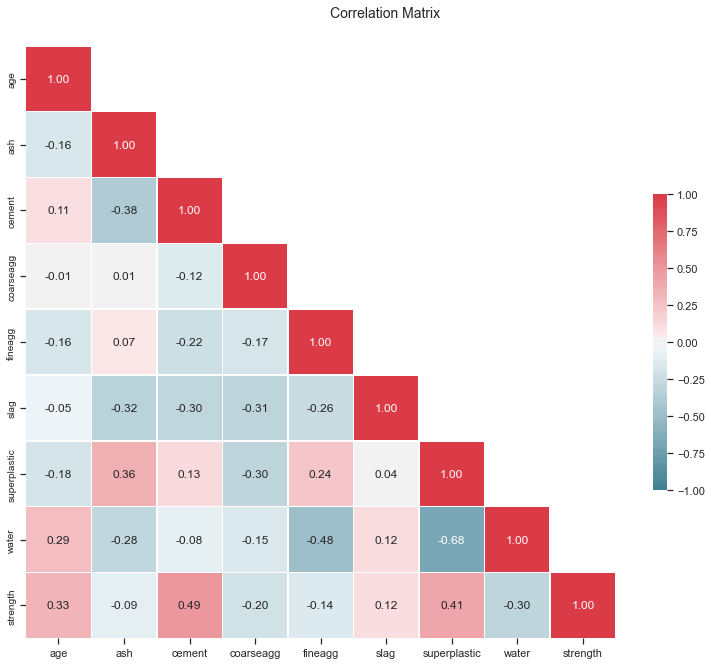

In [16]:
# Graphical representation of the correlation
correlation = train_df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig_corr, axes_corr = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

# Hide the upper half of the matrix - So that we see the values only once
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask, 1)] = True
sns.heatmap(correlation, ax=axes_corr,  linewidths=.5, cbar_kws={"shrink": .5}, cmap=cmap, vmin=-1, annot=True, fmt=".2f", mask=mask)
fig_corr.suptitle("Correlation Matrix", fontsize=14)
plt.yticks(fontsize=10, va="center")
fig_corr.tight_layout(pad=4.5)
plt.show();

##### Observation
* **age**
    * slight positive correlation with *water*
* **ash** 
    * slight positive correlation with *superplastic*
    * slight negative correlation with *cement*, *slag* and *water*.
* **cement**
    * slight negative correlation with *ash* and *slag*
* **coarseagg**
    * slight negative correlation with *slag* and *superplastic*
* **fineagg**
    * moderate negative correlation with *water*
* **slag**
    * slight negative correlation with *ash*, *cement* and *coarseagg*
* **superplastic**
    * slight positive correlation with *ash*
    * slight negative correlation with *coarseagg*
    * good negative correlation with *water*
* **water**
    * slight positive correlation with *age*
    * slight negative correlation with *ash*
    * moderate negative correlation with *fineagg*
    * good negative correlation with *superplastic*
<br><br>
* **conclusion**
    * No two attributes seem to have strong correlation in either direction, to be considered as redundant information and hence be considered for removal.
<br><br>
* **strength**
    * Shows slight positive correlation with *age*, *cement* and *superplastic*
    * Shows slight negative correlation with *water*

#### KDE Plot

Lets look at some of the joint distribution between the predictors and the strength (target) attribute

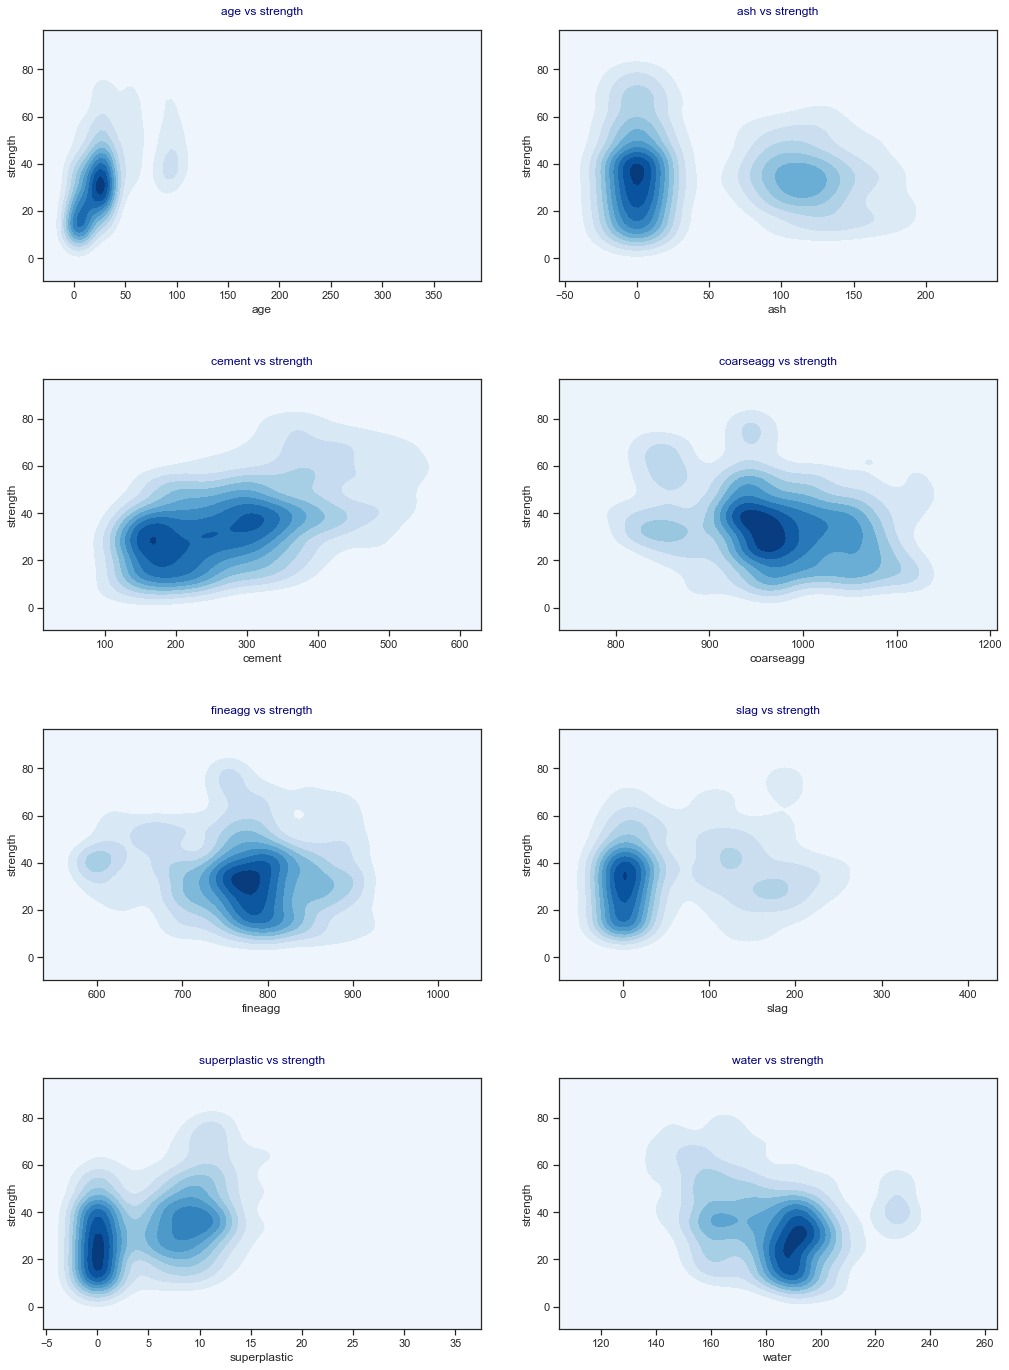

In [17]:
num_plots = len(all_columns)
total_cols = 2
total_rows = 4
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, figsize=(15, 20))
for i, var in enumerate(all_columns):
    row = i//total_cols
    pos = i % total_cols
    ax = sns.kdeplot(train_df[var], train_df["strength"], cmap="Blues", shade=True, ax=axs[row][pos])
    ax.set_title("{} vs strength".format(var), pad=15, color="navy")
fig.tight_layout(pad=3.5)
plt.show();


##### Observation
* **age** The probability density seems to be higher when age is around 47 and strength is around 30
* **ash** The probability density seems to be higher when ash is 0 and strength is around 38
* **cement** The probabiltiy density seems to be higher when cement is 170 and strength is around 30
* **coarseagg** The probability density seems to be higher when coarseagg is in the range 940-980 and strength in the range 20-40
* **fineagg** The probability density seems to be higher when fineagg is in the range 760-780 and strength in the range 25-35
* **slag** The probability density seems to be higher when slag is 0 and strength is around 38.
* **superplastic** The probability density seems to be higher when superplastic is around 0 and strength is in the range 18-28
* **water** The probability density seems to be higher when water is in the range 188-198 and strength is in the range 20-38

#### strength vs age, cement and superplastic

Since strength showed positive correlation with age, cement and superplastic, lets see if we can get visual relationship of all of them together

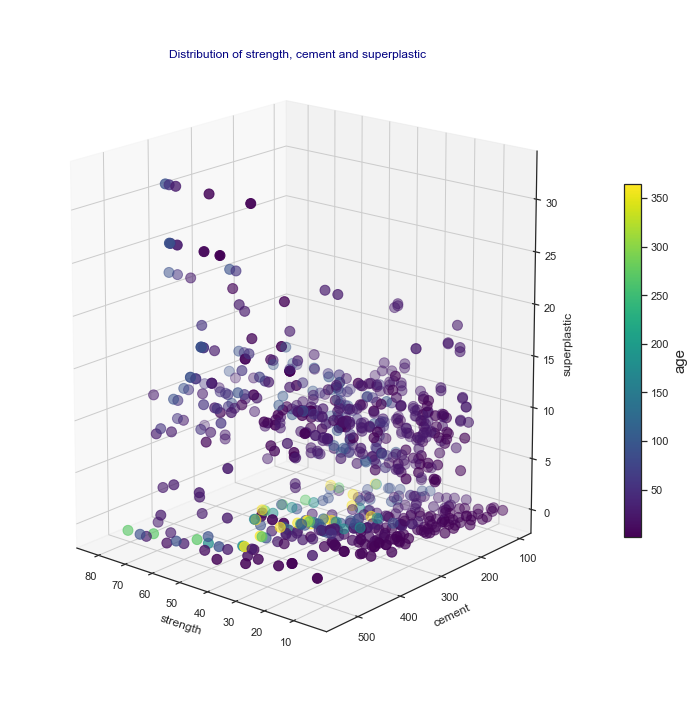

In [18]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(train_df['strength'], train_df['cement'], train_df['superplastic'], c=train_df["age"], s=100, cmap="viridis")
ax.view_init(15, 130)
ax.set_xlabel("strength")
ax.set_ylabel("cement")
ax.set_zlabel("superplastic")
lab = fig.colorbar(scatter, shrink=.5)
lab.set_label("age",fontsize = 15)
plt.title("Distribution of strength, cement and superplastic",color="navy")
plt.show();


##### Observation
We can see that entries with higher age exist for various values of strength and cement. But they are limited to lower values of superplastic.
As superplastic increases, age tends to be lower
This matches with what we observed in the pairplot as well

#### strength vs fineagg and coarseagg

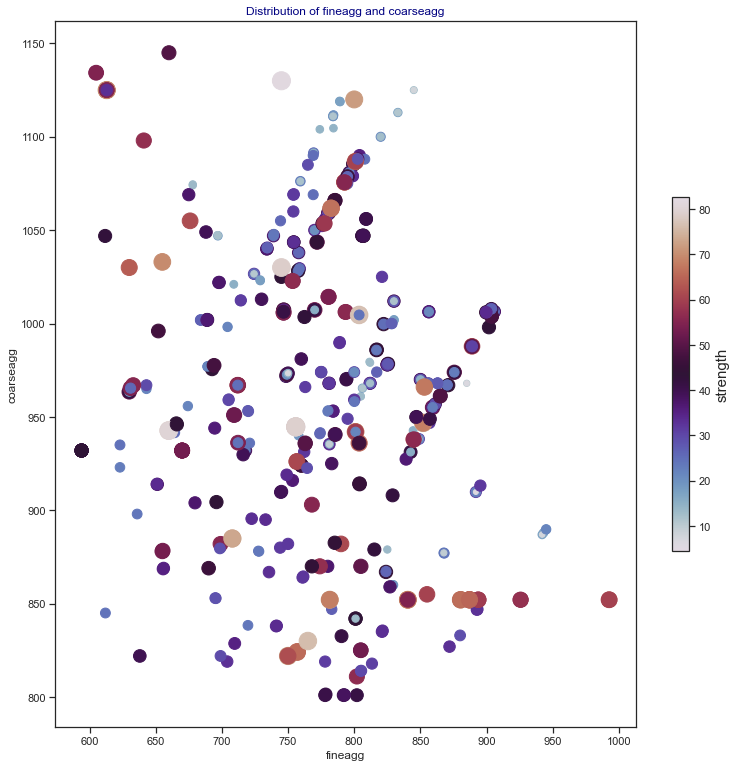

In [19]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)
scatter = ax.scatter(train_df['fineagg'], train_df['coarseagg'], c=train_df["strength"], s=train_df["strength"] * 4, cmap="twilight")
ax.set_xlabel("fineagg")
ax.set_ylabel("coarseagg")
lab = fig.colorbar(scatter, shrink=.5)
lab.set_label("strength",fontsize = 15)
plt.title("Distribution of fineagg and coarseagg",color="navy")
plt.show();

##### Observation
We notice both lower and higher strength for both lower and higher values of fineagg and coarseagg.
<br>
The values are pretty much scattered and there doesnt appear to be any visible pattern

#### strength vs water and cement

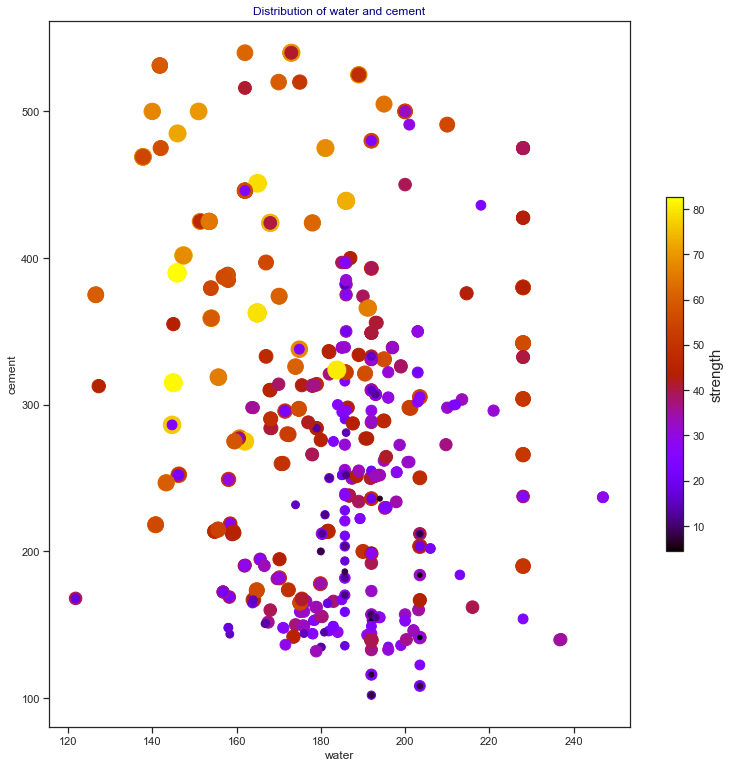

In [20]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)
scatter = ax.scatter(train_df['water'], train_df['cement'], c=train_df["strength"], s=train_df["strength"] * 4, cmap="gnuplot")
ax.set_xlabel("water")
ax.set_ylabel("cement")
lab = fig.colorbar(scatter, shrink=.5)
lab.set_label("strength",fontsize = 15)
plt.title("Distribution of water and cement",color="navy")
plt.show();

##### Observation
* For higher values of water, the strength is less to medium
* Most of the lower strength values are around water value of 180-190
* Most of the higher strengths are for higher cement values
* So clearly there seems to be relationship of moderate water and higher cement values for higher strength
* We can even try to create a new feature combining these attributes

### Feature Engineering

#### Adding new feature

As we saw above, there does exist a relationship between water, cement and strength. Due to lack of domain knowledge, I had to look this up online and found that there is indeed a ratio called **Water-Cement-Ratio** that combines these three values. Please refer to : https://en.wikipedia.org/wiki/Water–cement_ratio
<br>
Typically a ratio of 0.45 to 0.60 is used. For higher-strength concrete, lower ratio are used along with superplastic, to increase flexibility.
<br>
So we can add a new ratio column combining these two values

In [21]:
# Add the column before the strength column (position 8)
train_new_features_df = train_df.copy()
train_new_features_df.insert(8, "water_cement", train_new_features_df["water"] / train_new_features_df["cement"])

In [22]:
# Add to the hold out test set as well
test_new_features_df = test_df.copy()
test_new_features_df.insert(8, "water_cement", test_new_features_df["water"] / test_new_features_df["cement"])

In [23]:
print("Concrete Strength Data - With new ratio column")
display(HTML(train_new_features_df.head(10).to_html()))

Concrete Strength Data - With new ratio column


,age,ash,cement,coarseagg,fineagg,slag,superplastic,water,water_cement,strength
0,180,0.0,266.0,932.0,670.0,114.0,0.0,228.0,0.857143,48.70
1,3,0.0,313.3,1046.9,611.8,262.2,8.6,175.5,0.560166,28.80
2,270,0.0,475.0,932.0,594.0,0.0,0.0,228.0,0.480000,42.13
3,7,0.0,337.9,944.7,755.8,189.0,9.5,174.9,0.517609,35.10
4,28,0.0,339.0,1060.0,754.0,0.0,0.0,185.0,0.545723,31.65
5,91,0.0,375.0,852.1,992.6,93.8,23.4,126.6,0.337600,62.50
6,28,125.4,190.7,1090.0,804.0,0.0,7.8,162.1,0.850026,26.40
7,3,124.8,212.0,1085.4,799.5,0.0,7.8,159.0,0.750000,19.52
8,91,0.0,469.0,852.1,840.5,117.2,32.2,137.8,0.293817,70.70
9,7,0.0,339.0,1069.0,754.0,0.0,0.0,185.0,0.545723,21.16


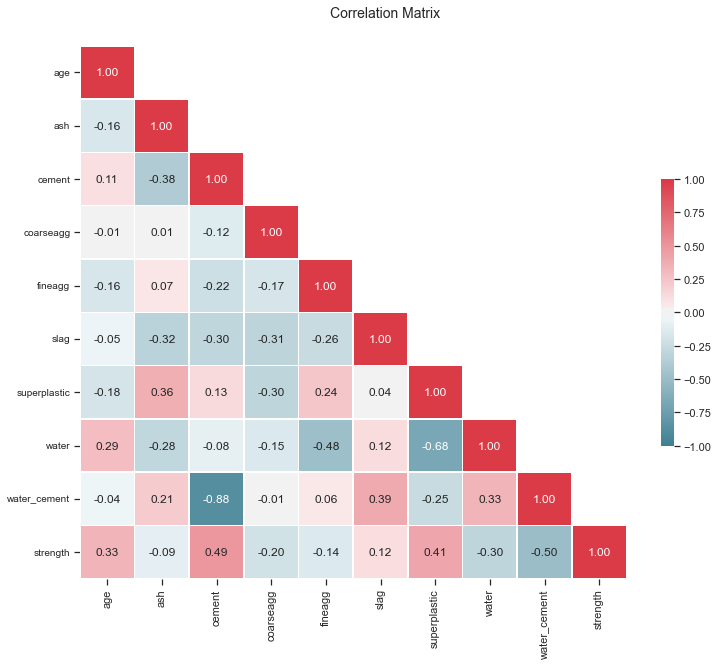

In [24]:
# Graphical representation of the correlation
correlation = train_new_features_df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig_corr, axes_corr = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

# Hide the upper half of the matrix - So that we see the values only once
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask, 1)] = True
sns.heatmap(correlation, ax=axes_corr,  linewidths=.5, cbar_kws={"shrink": .5}, cmap=cmap, vmin=-1, annot=True, fmt=".2f", mask=mask)
fig_corr.suptitle("Correlation Matrix", fontsize=14)
plt.yticks(fontsize=10, va="center")
fig_corr.tight_layout(pad=4.5)
plt.show();

##### Observation
* **water_cement** has strong negative correlation to *cement* and a slight positive correlation to *slag* and *water*
* **strength** has a moderate negative correlation with **water_cement**

#### Handle missing data

We have previously discussed that there are no missing data in the dataset. So we dont need to handle that separately

#### Handle outliers

As previous discussed in the univariate analysis, other than ash, cement, coarseagg, slag, the other attributes have outliers and we need to handle them.
<br>
We will replace the outliers with the median

In [25]:
# Cleanup raw data set
for column in train_df.columns:
    median = train_df[column].median()
    q1 = train_df[column].quantile(q=0.25)
    q3 = train_df[column].quantile(q=0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * (iqr)
    upper_whisker = q3 + 1.5 * (iqr)
    train_df[column] = np.where((train_df[column] > upper_whisker) | (train_df[column] < lower_whisker), median, train_df[column])

# Cleanup new data set with new features
for column in train_new_features_df.columns:
    median = train_new_features_df[column].median()
    q1 = train_new_features_df[column].quantile(q=0.25)
    q3 = train_new_features_df[column].quantile(q=0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * (iqr)
    upper_whisker = q3 + 1.5 * (iqr)
    train_new_features_df[column] = np.where((train_new_features_df[column] > upper_whisker) | (train_new_features_df[column] < lower_whisker), median, train_new_features_df[column])

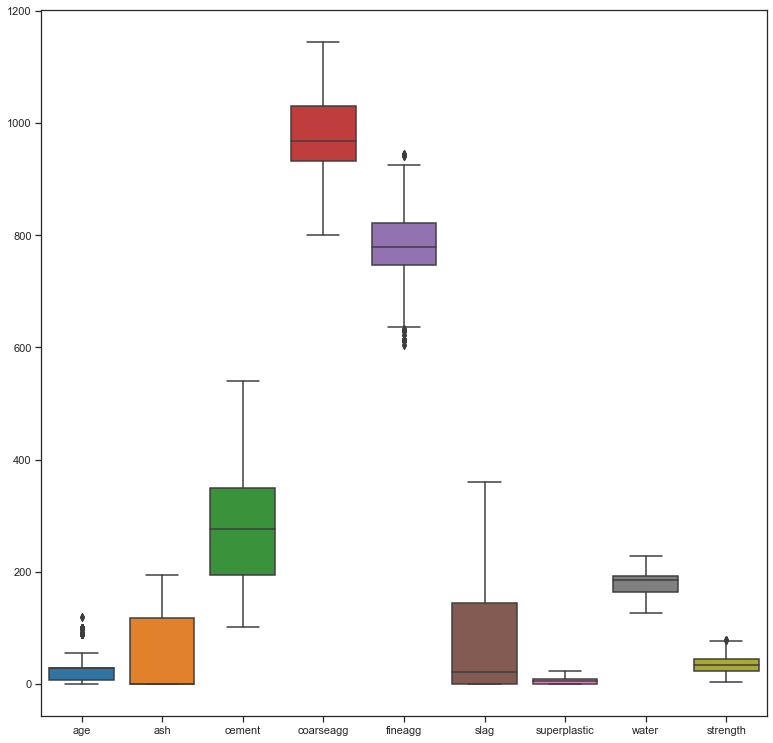

In [26]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)
box = sns.boxplot(data=train_df)

##### Observation
* Other than **age**, **fineagg** and **strength**, outliers have been removed in other columns.

#### Model Complexity

As we had observed earlier from the pairplot and correlation matrix, not all predictors have a linear relationship with the target (strength).
This aligns with the dataset description from the source website, which says 
> The concrete compressive strength is a highly nonlinear function of age and ingredients. 
> These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate

Based on this, a simple linear model will not be good enough for this problem.  So, we will have to consider quadratic or higher degree features

### Model Creation

We will proceed with the model creation. We will explore performance for
* Raw dataset
* Dataset with new features (including polynomail features)


We will follow the pipeline methodlogy to automate some of the steps.
<br>
We will use StandardScaler for scaling the data, because unit for **age** and other attributes are different. This will make sure the data is unitless with unit variance

In [27]:
# Training and Testing set for raw data
X_train = train_df.drop(columns=["strength"])
y_train = train_df[["strength"]]

X_test = test_df.drop(columns=["strength"])
y_test = test_df[["strength"]]

In [28]:
# Training and Testing set for data set with new features
X_new_features_train = train_new_features_df.drop(columns=["strength"])
y_new_features_train = train_new_features_df[["strength"]]

X_new_features_test = test_new_features_df.drop(columns=["strength"])
y_new_features_test = test_new_features_df[["strength"]]

#### Model with raw data set

In [29]:
raw_result_df = pd.DataFrame({"Algorithm":[], "KFold - R2 Score":[], "Test - Score":[]})

In [30]:
raw_pipelines = []

In [31]:
raw_pipelines.append(("Linear Regression", Pipeline([("scaler", StandardScaler()), ("regression", LinearRegression())])))
raw_pipelines.append(("Decision Tree Regressor", Pipeline([("scaler", StandardScaler()), ("regression", DecisionTreeRegressor(max_depth=4, random_state=my_random_state))])))
raw_pipelines.append(("AdaBoost Regressor", Pipeline([("scaler", StandardScaler()), ("regression", AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4, random_state=my_random_state), random_state=my_random_state))])))
raw_pipelines.append(("Random Forest Regressor", Pipeline([("scaler", StandardScaler()), ("regression", RandomForestRegressor(max_depth=4, random_state=my_random_state))])))
raw_pipelines.append(("Bagging Regressor", Pipeline([("scaler", StandardScaler()), ("regression", BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=4, random_state=my_random_state), random_state=my_random_state))])))
raw_pipelines.append(("Gradient Boost Regressor", Pipeline([("scaler", StandardScaler()), ("regression", GradientBoostingRegressor(max_depth=4, random_state=my_random_state))])))
raw_pipelines.append(("KNN Regressor", Pipeline([("scaler", StandardScaler()), ("regression", KNeighborsRegressor())])))
raw_pipelines.append(("Support Vector Regressor", Pipeline([("scaler", StandardScaler()), ("regression", SVR())])))

In [32]:
for i, value in enumerate(raw_pipelines):
    name, pipeline = value
    kfold = KFold(n_splits=10, random_state=my_random_state)
    folds_result = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring="r2")
    fold_score = "{0:0.2f}% (+/- {1:0.2f}%)".format(folds_result.mean() * 100, folds_result.std() * 100)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    test_score = r2_score(y_test, y_pred) * 100
    test_score_string = "{0:0.2f}%".format(test_score)
    raw_result_df.loc[i] = [name, fold_score, test_score_string]

In [33]:
raw_result_df_disp = raw_result_df.copy()
raw_result_df_disp.style.apply(lambda x: ['background: lightgreen' if x.name in [5] else '' for i in x], axis=1)

,Algorithm,KFold - R2 Score,Test - Score
0,Linear Regression,68.46% (+/- 5.10%),16.45%
1,Decision Tree Regressor,69.50% (+/- 5.59%),68.70%
2,AdaBoost Regressor,78.34% (+/- 5.11%),77.92%
3,Random Forest Regressor,75.25% (+/- 4.84%),75.01%
4,Bagging Regressor,74.51% (+/- 4.23%),75.45%
5,Gradient Boost Regressor,87.73% (+/- 4.46%),88.75%
6,KNN Regressor,75.14% (+/- 5.23%),74.12%
7,Support Vector Regressor,68.09% (+/- 4.49%),67.84%


##### Observation
* Based on the above results, we see that the Ensemble models have better performance for the problem, for raw dataset without any feature engineering
* Gradient Boot Regressor has good performance for both seen and unseen data
* Basic Linear Regression performs very poorly and this is expected

In [34]:
raw_result_df.drop([0,1,4,6,7], inplace=True)
raw_result_df.reset_index(inplace=True, drop=True)

#### Model with new features dataset

In [35]:
new_feature_result_df = pd.DataFrame({"Algorithm":[], "KFold - R2 Score":[], "Test - Score":[]})

In [36]:
new_feature_pipelines = []

In [37]:
new_feature_pipelines.append(("Linear Regression", Pipeline([("new_features", PolynomialFeatures(degree = 2, interaction_only=True)), ("scaler", StandardScaler()), ("regression", LinearRegression())])))
new_feature_pipelines.append(("Decision Tree Regressor", Pipeline([("new_features", PolynomialFeatures(degree = 2, interaction_only=True)), ("scaler", StandardScaler()), ("regression", DecisionTreeRegressor(max_depth=4, random_state=my_random_state))])))
new_feature_pipelines.append(("AdaBoost Regressor", Pipeline([("new_features", PolynomialFeatures(degree = 2, interaction_only=True)), ("scaler", StandardScaler()), ("regression", AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4, random_state=my_random_state), random_state=my_random_state))])))
new_feature_pipelines.append(("Random Forest Regressor", Pipeline([("new_features", PolynomialFeatures(degree = 2, interaction_only=True)), ("scaler", StandardScaler()), ("regression", RandomForestRegressor(max_depth=4, random_state=my_random_state))])))
new_feature_pipelines.append(("Bagging Regressor", Pipeline([("new_features", PolynomialFeatures(degree = 2, interaction_only=True)), ("scaler", StandardScaler()), ("regression", BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=4, random_state=my_random_state), random_state=my_random_state))])))
new_feature_pipelines.append(("Gradient Boost Regressor", Pipeline([("new_features", PolynomialFeatures(degree = 2, interaction_only=True)), ("scaler", StandardScaler()), ("regression", GradientBoostingRegressor(max_depth=4, random_state=my_random_state))])))
new_feature_pipelines.append(("KNN Regressor", Pipeline([("new_features", PolynomialFeatures(degree = 2, interaction_only=True)), ("scaler", StandardScaler()), ("regression", KNeighborsRegressor())])))
new_feature_pipelines.append(("Support Vector Regressor", Pipeline([("new_features", PolynomialFeatures(degree = 2, interaction_only=True)), ("scaler", StandardScaler()), ("regression", SVR())])))

In [38]:
for i, value in enumerate(new_feature_pipelines):
    name, pipeline = value
    kfold = KFold(n_splits=10, random_state=my_random_state)
    folds_result = cross_val_score(pipeline, X_new_features_train, y_new_features_train, cv=kfold, scoring="r2")
    fold_score = "{0:0.2f}% (+/- {1:0.2f}%)".format(folds_result.mean() * 100, folds_result.std() * 100)
    pipeline.fit(X_new_features_train, y_new_features_train)
    y_new_features_pred = pipeline.predict(X_new_features_test)
    test_score = r2_score(y_new_features_test, y_new_features_pred) * 100
    test_score_string = "{0:0.2f}%".format(test_score)
    new_feature_result_df.loc[i] = [name, fold_score, test_score_string]

In [39]:
new_feature_result_df_disp = new_feature_result_df.copy()
new_feature_result_df_disp.style.apply(lambda x: ['background: lightgreen' if x.name in [5] else '' for i in x], axis=1)

,Algorithm,KFold - R2 Score,Test - Score
0,Linear Regression,46.76% (+/- 44.40%),28.46%
1,Decision Tree Regressor,72.76% (+/- 5.22%),70.09%
2,AdaBoost Regressor,82.35% (+/- 4.68%),81.02%
3,Random Forest Regressor,79.98% (+/- 5.00%),76.35%
4,Bagging Regressor,79.42% (+/- 5.06%),76.06%
5,Gradient Boost Regressor,87.49% (+/- 4.40%),89.11%
6,KNN Regressor,78.26% (+/- 4.72%),78.96%
7,Support Vector Regressor,70.44% (+/- 3.87%),69.51%


##### Observation
* With the new features added, we see that the Ensemble models perform much better compared to other models
* Performance of base LinearRegression has improved
* Gradient Boost Regressor continues to be the best performing but there is no significant improved either.

In [40]:
new_feature_result_df.drop([0,1,4,6,7], inplace=True)
new_feature_result_df.reset_index(inplace=True, drop=True)

#### Important Features

From previous analysis, we see that Ensemble models in general provide better performance. And there is no significant improvement in performance between raw dataset and dataset with new features added for the ensemble models.

In [41]:
pipeline_adaboost = Pipeline([("scaler", StandardScaler()), ("regression", AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4, random_state=my_random_state), random_state=my_random_state))])
pipeline_random_forest = Pipeline([("scaler", StandardScaler()), ("regression", RandomForestRegressor(max_depth=4, random_state=my_random_state))])
pipeline_gradient_boost = Pipeline([("scaler", StandardScaler()), ("regression", GradientBoostingRegressor(max_depth=4, random_state=my_random_state))])

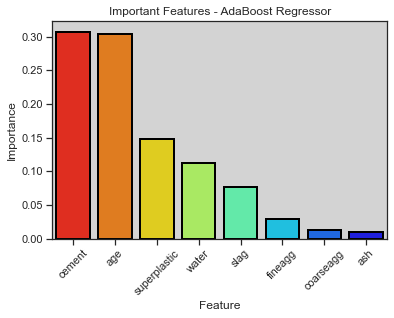

In [42]:
imp_features_adaboost_df = pd.DataFrame({"Feature": [], "Importance": []})
pipeline_adaboost.fit(X_train, y_train)
imp_features_adaboost = pipeline_adaboost.steps[1][1].feature_importances_
imp_features_adaboost_df["Feature"] = X_train.columns
imp_features_adaboost_df["Importance"] = imp_features_adaboost
imp_features_adaboost_df.sort_values(by="Importance", ascending=False, inplace=True)

ax = sns.barplot(imp_features_adaboost_df["Feature"],imp_features_adaboost_df["Importance"], palette="jet_r", linewidth=2, edgecolor="k")
ax.set_title("Important Features - AdaBoost Regressor")
ax.set_facecolor("lightgrey")
plt.xticks(rotation=45)
plt.show();

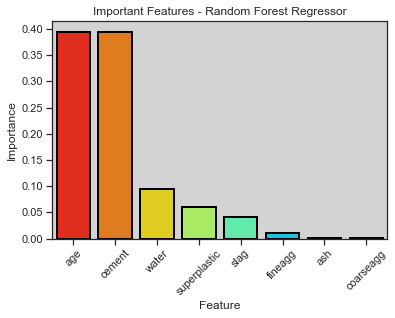

In [43]:
imp_features_random_forest_df = pd.DataFrame({"Feature": [], "Importance": []})
pipeline_random_forest.fit(X_train, y_train)
imp_features_random_forest = pipeline_random_forest.steps[1][1].feature_importances_
imp_features_random_forest_df["Feature"] = X_train.columns
imp_features_random_forest_df["Importance"] = imp_features_random_forest
imp_features_random_forest_df.sort_values(by="Importance", ascending=False, inplace=True)

ax = sns.barplot(imp_features_random_forest_df["Feature"],imp_features_random_forest_df["Importance"], palette="jet_r", linewidth=2, edgecolor="k")
ax.set_title("Important Features - Random Forest Regressor")
ax.set_facecolor("lightgrey")
plt.xticks(rotation=45)
plt.show();

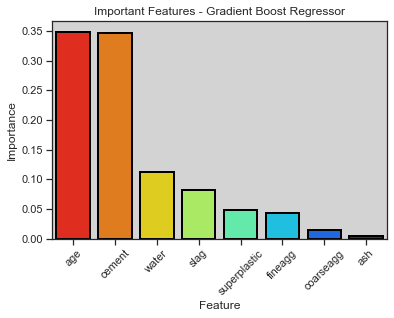

In [44]:
imp_features_gradient_boost_df = pd.DataFrame({"Feature": [], "Importance": []})
pipeline_gradient_boost.fit(X_train, y_train)
imp_features_gradient_boost = pipeline_gradient_boost.steps[1][1].feature_importances_
imp_features_gradient_boost_df["Feature"] = X_train.columns
imp_features_gradient_boost_df["Importance"] = imp_features_gradient_boost
imp_features_gradient_boost_df.sort_values(by="Importance", ascending=False, inplace=True)

ax = sns.barplot(imp_features_gradient_boost_df["Feature"],imp_features_gradient_boost_df["Importance"], palette="jet_r", linewidth=2, edgecolor="k")
ax.set_title("Important Features - Gradient Boost Regressor")
ax.set_facecolor("lightgrey")
plt.xticks(rotation=45)
plt.show();

##### Observation
* When comparing the ensemble model and their important features, all of them have the following columns in their top 5 important list:
**age**, **cement**, **water**, **superplastic** and **slag**

### Model Tuning

#### Considering only important features

Based on the above analysis, lets consider only the most important features in our dataset for further analysis

In [45]:
# Training and Testing set for raw data
X_train = train_df.drop(columns=["fineagg","coarseagg","ash","strength"])
y_train = train_df[["strength"]]

X_test = test_df.drop(columns=["fineagg","coarseagg","ash","strength"])
y_test = test_df[["strength"]]

In [46]:
# Training and Testing set for data set with new features
X_new_features_train = train_new_features_df.drop(columns=["fineagg","coarseagg","ash","strength"])
y_new_features_train = train_new_features_df[["strength"]]

X_new_features_test = test_new_features_df.drop(columns=["fineagg","coarseagg","ash","strength"])
y_new_features_test = test_new_features_df[["strength"]]

#### Tuning model with raw data set

In [47]:
tuned_result_df = pd.DataFrame({"Algorithm":[], "RandomSearchCV - R2 Score":[], "Test - Score":[]})

In [48]:
decision_tree_regressor = DecisionTreeRegressor(random_state=my_random_state)
pipeline_adaboost = Pipeline([("scaler", StandardScaler()), ("regression", AdaBoostRegressor(base_estimator=decision_tree_regressor, random_state=my_random_state))])
adaboost_param_dist = {
    "regression__base_estimator__criterion": ["mse", "friedman_mse", "mae"],
    "regression__base_estimator__splitter": ["best", "random"],
    "regression__base_estimator__max_depth": [4, 8, 12, 16],
    "regression__base_estimator__max_features": ["auto", "sqrt"],
    "regression__base_estimator__min_samples_leaf": [1, 2, 4, 8],
    "regression__n_estimators": [50, 100],
    "regression__learning_rate": [0.01, 0.05, 0.1, 0.3, 1],
    "regression__loss": ["linear", "square", "exponential"]
}
randomCV = RandomizedSearchCV(pipeline_adaboost , param_distributions = adaboost_param_dist, cv = 5, n_iter=10, scoring="r2", random_state=my_random_state)

In [49]:
randomCV.fit(X_train, y_train)
y_pred = randomCV.predict(X_test)
test_score = r2_score(y_test, y_pred) * 100
train_score_string = "{0:0.2f}%".format(randomCV.best_score_ * 100)
test_score_string = "{0:0.2f}%".format(test_score)
tuned_result_df.loc[0] = ["Tuned AdaBoost Regressor", train_score_string, test_score_string]
print("Tuned AdaBoost Regressor is : ")
randomCV.best_estimator_

Tuned AdaBoost Regressor is : 


Pipeline(steps=[('scaler', StandardScaler()),
                ('regression',
                 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12,
                                                                        max_features='auto',
                                                                        min_samples_leaf=2,
                                                                        random_state=5),
                                   learning_rate=0.1, random_state=5))])

In [50]:
display(HTML(tuned_result_df.to_html()))

,Algorithm,RandomSearchCV - R2 Score,Test - Score
0,Tuned AdaBoost Regressor,86.03%,89.66%


In [51]:
pipeline_random_forest = Pipeline([("scaler", StandardScaler()), ("regression", RandomForestRegressor(random_state=my_random_state))])
random_forest_param_dist = {
    "regression__n_estimators": [50, 100],
    "regression__criterion": ["mse", "mae"],
    "regression__max_depth": [4, 8, 12, 16],
    "regression__min_samples_leaf": [1, 2, 4, 8],
    "regression__max_features": ["auto", "sqrt", "log2"],
    "regression__bootstrap": [True, False]
}
randomCV = RandomizedSearchCV(pipeline_random_forest , param_distributions = random_forest_param_dist, cv = 5, n_iter=10, scoring="r2", random_state=my_random_state)

In [52]:
randomCV.fit(X_train, y_train)
y_pred = randomCV.predict(X_test)
test_score = r2_score(y_test, y_pred) * 100
train_score_string = "{0:0.2f}%".format(randomCV.best_score_ * 100)
test_score_string = "{0:0.2f}%".format(test_score)
tuned_result_df.loc[1] = ["Tuned Random Forest Regressor", train_score_string, test_score_string]
print("Tuned Random Forest Regressor is : ")
randomCV.best_estimator_

Tuned Random Forest Regressor is : 


Pipeline(steps=[('scaler', StandardScaler()),
                ('regression',
                 RandomForestRegressor(max_depth=12, random_state=5))])

In [53]:
display(HTML(tuned_result_df.to_html()))

,Algorithm,RandomSearchCV - R2 Score,Test - Score
0,Tuned AdaBoost Regressor,86.03%,89.66%
1,Tuned Random Forest Regressor,86.82%,90.71%


In [54]:
pipeline_gradient_boost = Pipeline([("scaler", StandardScaler()), ("regression", GradientBoostingRegressor(random_state=my_random_state))])
gradient_boost_param_dist = {
    "regression__loss": ["ls", "lad", "huber", "quantile"],
    "regression__learning_rate": [0.01, 0.05, 0.1, 0.3, 1],
    "regression__n_estimators": [50, 100],
    "regression__criterion": ["mse", "friedman_mse", "mae"],
    "regression__max_depth": [4, 8, 12, 16],
    "regression__max_features": ["auto", "sqrt", "log2"],
    "regression__min_samples_leaf": [1, 2, 4, 8],
    "regression__max_features": ["auto", "sqrt", "log2"]
}
randomCV = RandomizedSearchCV(pipeline_gradient_boost , param_distributions = gradient_boost_param_dist, cv = 5, n_iter=10, scoring="r2", random_state=my_random_state)

In [55]:
randomCV.fit(X_train, y_train)
y_pred = randomCV.predict(X_test)
test_score = r2_score(y_test, y_pred) * 100
train_score_string = "{0:0.2f}%".format(randomCV.best_score_ * 100)
test_score_string = "{0:0.2f}%".format(test_score)
tuned_result_df.loc[2] = ["Tuned Gradient Boost Regressor", train_score_string, test_score_string]
print("Tuned Gradient Boost Regressor is : ")
randomCV.best_estimator_

Tuned Gradient Boost Regressor is : 


Pipeline(steps=[('scaler', StandardScaler()),
                ('regression',
                 GradientBoostingRegressor(loss='huber', max_depth=8,
                                           max_features='sqrt',
                                           min_samples_leaf=2,
                                           random_state=5))])

In [56]:
display(HTML(tuned_result_df.to_html()))

,Algorithm,RandomSearchCV - R2 Score,Test - Score
0,Tuned AdaBoost Regressor,86.03%,89.66%
1,Tuned Random Forest Regressor,86.82%,90.71%
2,Tuned Gradient Boost Regressor,86.62%,91.65%


In [57]:
raw_result_df[["Tuned R2 Score", "Tuned Test Score"]] = tuned_result_df[["RandomSearchCV - R2 Score", "Test - Score"]]

##### Observation

In [58]:
raw_result_df_disp = raw_result_df.copy()
raw_result_df_disp.style.apply(lambda x: ['background: lightgreen' if x.name in [2] else '' for i in x], axis=1)

,Algorithm,KFold - R2 Score,Test - Score,Tuned R2 Score,Tuned Test Score
0,AdaBoost Regressor,78.34% (+/- 5.11%),77.92%,86.03%,89.66%
1,Random Forest Regressor,75.25% (+/- 4.84%),75.01%,86.82%,90.71%
2,Gradient Boost Regressor,87.73% (+/- 4.46%),88.75%,86.62%,91.65%


* We see significant improvement in the score after tuning
* Gradient Boost got the most improvement, raising its Test Score after tuning to **91.65%** and the training score is **86.62%** showing there was no overfitting

#### Tuning model with new features dataset 

In [59]:
tuned_new_features_result_df = pd.DataFrame({"Algorithm":[], "RandomSearchCV - R2 Score":[], "Test - Score":[]})

In [60]:
decision_tree_regressor = DecisionTreeRegressor(random_state=my_random_state)
pipeline_adaboost = Pipeline([("new_features", PolynomialFeatures(degree = 2, interaction_only=True)), ("scaler", StandardScaler()), ("regression", AdaBoostRegressor(base_estimator=decision_tree_regressor, random_state=my_random_state))])
adaboost_param_dist = {
    "regression__base_estimator__criterion": ["mse", "friedman_mse", "mae"],
    "regression__base_estimator__splitter": ["best", "random"],
    "regression__base_estimator__max_depth": [4, 8, 12, 16],
    "regression__base_estimator__max_features": ["auto", "sqrt"],
    "regression__base_estimator__min_samples_leaf": [1, 2, 4, 8],
    "regression__n_estimators": [50, 100],
    "regression__learning_rate": [0.01, 0.05, 0.1, 0.3, 1],
    "regression__loss": ["linear", "square", "exponential"]
}
randomCV = RandomizedSearchCV(pipeline_adaboost , param_distributions = adaboost_param_dist, cv = 5, n_iter=10, scoring="r2", random_state=my_random_state)

In [61]:
randomCV.fit(X_new_features_train, y_new_features_train)
y_new_features_pred = randomCV.predict(X_new_features_test)
test_score = r2_score(y_new_features_test, y_new_features_pred) * 100
train_score_string = "{0:0.2f}%".format(randomCV.best_score_ * 100)
test_score_string = "{0:0.2f}%".format(test_score)
tuned_new_features_result_df.loc[0] = ["Tuned AdaBoost Regressor", train_score_string, test_score_string]
print("Tuned AdaBoost Regressor is : ")
randomCV.best_estimator_

Tuned AdaBoost Regressor is : 


Pipeline(steps=[('new_features', PolynomialFeatures(interaction_only=True)),
                ('scaler', StandardScaler()),
                ('regression',
                 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                                        max_depth=12,
                                                                        max_features='auto',
                                                                        min_samples_leaf=4,
                                                                        random_state=5,
                                                                        splitter='random'),
                                   learning_rate=0.1, loss='exponential',
                                   random_state=5))])

In [62]:
display(HTML(tuned_new_features_result_df.to_html()))

,Algorithm,RandomSearchCV - R2 Score,Test - Score
0,Tuned AdaBoost Regressor,85.85%,88.33%


In [63]:
pipeline_random_forest = Pipeline([("new_features", PolynomialFeatures(degree = 2, interaction_only=True)), ("scaler", StandardScaler()), ("regression", RandomForestRegressor(random_state=my_random_state))])
random_forest_param_dist = {
    "regression__n_estimators": [50, 100],
    "regression__criterion": ["mse", "mae"],
    "regression__max_depth": [4, 8, 12, 16],
    "regression__min_samples_leaf": [1, 2, 4, 8],
    "regression__max_features": ["auto", "sqrt", "log2"],
    "regression__bootstrap": [True, False]
}
randomCV = RandomizedSearchCV(pipeline_random_forest , param_distributions = random_forest_param_dist, cv = 5, n_iter=10, scoring="r2", random_state=my_random_state)

In [64]:
randomCV.fit(X_new_features_train, y_new_features_train)
y_new_features_pred = randomCV.predict(X_new_features_test)
test_score = r2_score(y_new_features_test, y_new_features_pred) * 100
train_score_string = "{0:0.2f}%".format(randomCV.best_score_ * 100)
test_score_string = "{0:0.2f}%".format(test_score)
tuned_new_features_result_df.loc[1] = ["Tuned Random Forest Regressor", train_score_string, test_score_string]
print("Tuned Random Forest Regressor is : ")
randomCV.best_estimator_

Tuned Random Forest Regressor is : 


Pipeline(steps=[('new_features', PolynomialFeatures(interaction_only=True)),
                ('scaler', StandardScaler()),
                ('regression',
                 RandomForestRegressor(bootstrap=False, criterion='mae',
                                       max_depth=16, max_features='log2',
                                       random_state=5))])

In [65]:
display(HTML(tuned_new_features_result_df.to_html()))

,Algorithm,RandomSearchCV - R2 Score,Test - Score
0,Tuned AdaBoost Regressor,85.85%,88.33%
1,Tuned Random Forest Regressor,86.77%,90.39%


In [66]:
pipeline_gradient_boost = Pipeline([("new_features", PolynomialFeatures(degree = 2, interaction_only=True)), ("scaler", StandardScaler()), ("regression", GradientBoostingRegressor(random_state=my_random_state))])
gradient_boost_param_dist = {
    "regression__loss": ["ls", "lad", "huber", "quantile"],
    "regression__learning_rate": [0.01, 0.05, 0.1, 0.3, 1],
    "regression__n_estimators": [50, 100],
    "regression__criterion": ["mse", "friedman_mse", "mae"],
    "regression__max_depth": [4, 8, 12, 16],
    "regression__max_features": ["auto", "sqrt", "log2"],
    "regression__min_samples_leaf": [1, 2, 4, 8],
    "regression__max_features": ["auto", "sqrt", "log2"]
}
randomCV = RandomizedSearchCV(pipeline_gradient_boost , param_distributions = gradient_boost_param_dist, cv = 5, n_iter=10, scoring="r2", random_state=my_random_state)

In [67]:
randomCV.fit(X_new_features_train, y_new_features_train)
y_new_features_pred = randomCV.predict(X_new_features_test)
test_score = r2_score(y_new_features_test, y_new_features_pred) * 100
train_score_string = "{0:0.2f}%".format(randomCV.best_score_ * 100)
test_score_string = "{0:0.2f}%".format(test_score)
tuned_new_features_result_df.loc[2] = ["Tuned Gradient Boost Regressor", train_score_string, test_score_string]
print("Tuned Gradient Boost Regressor is : ")
randomCV.best_estimator_

Tuned Gradient Boost Regressor is : 


Pipeline(steps=[('new_features', PolynomialFeatures(interaction_only=True)),
                ('scaler', StandardScaler()),
                ('regression',
                 GradientBoostingRegressor(loss='huber', max_depth=8,
                                           max_features='sqrt',
                                           min_samples_leaf=2,
                                           random_state=5))])

In [68]:
display(HTML(tuned_new_features_result_df.to_html()))

,Algorithm,RandomSearchCV - R2 Score,Test - Score
0,Tuned AdaBoost Regressor,85.85%,88.33%
1,Tuned Random Forest Regressor,86.77%,90.39%
2,Tuned Gradient Boost Regressor,86.30%,91.35%


In [69]:
new_feature_result_df[["Tuned R2 Score", "Tuned Test Score"]] = tuned_new_features_result_df[["RandomSearchCV - R2 Score", "Test - Score"]]

##### Observation

In [70]:
new_feature_result_df_disp = new_feature_result_df.copy()
new_feature_result_df_disp.style.apply(lambda x: ['background: lightgreen' if x.name in [2] else '' for i in x], axis=1)

,Algorithm,KFold - R2 Score,Test - Score,Tuned R2 Score,Tuned Test Score
0,AdaBoost Regressor,82.35% (+/- 4.68%),81.02%,85.85%,88.33%
1,Random Forest Regressor,79.98% (+/- 5.00%),76.35%,86.77%,90.39%
2,Gradient Boost Regressor,87.49% (+/- 4.40%),89.11%,86.30%,91.35%


* We see significant improvement in the scores after tuning
* Gradient Boost got the most improvement, raising its Testing score after tuning to **91.35%** and the training score to **86.30%**, showing there was no overfitting

### Conclusion

* So we started off with a raw dataset, and we did EDA on the dataset and fixed any known outliers and missing data.
* We next made the decision to add Polynomial features and other discovered features to the dataset.
* We went ahead and tested couple of regressors on both the raw dataset as well as dataset with new features added (including polynomial features)
* After testing, we found that the ensemble models generally performed well for the given problem, for both raw dataset and dataset with new features
* Then we checked what are the important features as discovered by the ensemble models, and picked the top 5 attributes of the 8 provided.
* We removed any features which were not considered important
* Then we proceeded to tune the regressors for both kinds of data
* Here is a summary of the results we observed

#### Raw dataset Summary

In [71]:
raw_result_df_disp = raw_result_df.copy()
raw_result_df_disp.style.apply(lambda x: ['background: lightgreen' if x.name in [2] else '' for i in x], axis=1)

,Algorithm,KFold - R2 Score,Test - Score,Tuned R2 Score,Tuned Test Score
0,AdaBoost Regressor,78.34% (+/- 5.11%),77.92%,86.03%,89.66%
1,Random Forest Regressor,75.25% (+/- 4.84%),75.01%,86.82%,90.71%
2,Gradient Boost Regressor,87.73% (+/- 4.46%),88.75%,86.62%,91.65%


#### Dataset with new features Summary

In [72]:
new_feature_result_df_disp = new_feature_result_df.copy()
new_feature_result_df_disp.style.apply(lambda x: ['background: lightgreen' if x.name in [2] else '' for i in x], axis=1)

,Algorithm,KFold - R2 Score,Test - Score,Tuned R2 Score,Tuned Test Score
0,AdaBoost Regressor,82.35% (+/- 4.68%),81.02%,85.85%,88.33%
1,Random Forest Regressor,79.98% (+/- 5.00%),76.35%,86.77%,90.39%
2,Gradient Boost Regressor,87.49% (+/- 4.40%),89.11%,86.30%,91.35%


##### Observation

Based on the observed results, we have achieved the goal of modeling and tuning to reach 80% to 95% of R2score.

We see that the **Tuned Gradient Boost Regressor** on the raw dataset, gives the highest performance for unseen data, of **91.65%** and this is the recommended model for this problem